# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
a.
1. booking_id: The values are nominal and unique identifiers. The values match the description.

2. months_as_member: The values are discrete and non of the values is less than one which means that the number of months as fitness club member is a minimum of 1 month. The values match the description.

3. weight: Not all values in the weight column are continuous and rounded to 2 decimal
places, some are discrete. The minimum possible value is 40kg which meets some part of the criteria. Overall, the values do not completely match the description.

4. days_before: Some values are discrete while others have strings along with the numbers. The number of days before the class member is registered; minimum 1 day criteria is met. 
Overall, the values do not completely match the description.

5. day_of_week: Some values are ordinal and they follow the pattern of the first three characters in the name of the day of the week while some days name are written in full. Overall, the values do not completely match the description.

6. time: The values are ordinal and represent the time of day of the class. The values match the description.

7. category: A large number of these values are nominal but they contain missing values. Overall, the values do not completely match the description.

8. attended: The values are nominal and represent whether the member attended the class or not. The values match the description.

b.
booking_id: Since it is a unique identifier, missing values are not possible.

months_as_member: No missing values.

weight: There are 20 missing values.

days_before: No missing values.

day_of_week: No missing values.

time: No missing values.

category: 13 missing values.

attended: No missing values.

c.
weight - 1.The approach I used in handling missing values in the "weight" column is to calculate the overall average excluding missing values and replace missing values with the overall average 
2. To handle integer values present in the float-type "weight" column, I converted integer values to float rounded to 2 decimal places.

days_before - In handling discrete values that have strings attached to the numbers, I used string manipulation technique to extract the numeric part and convert it to the integer data type.

day_of_week - To handle some days of the week that do not match the description, I sliced the 'day_of_week' column to the first three characters.

category - I filled missing values with 'unknown' to make the column match the description provided.

In [1]:
## Task 1

import pandas as pd

fitness = pd.read_csv('fitness_class_2212.csv')

# To convert integer values to float rounded to 2 decimal places
fitness['weight'] = fitness['weight'].astype(float).round(2)

# To calculate the overall average excluding missing values
average = fitness['weight'].mean()

# To replace missing values with the overall average
fitness['weight'].fillna(average, inplace=True)

# To extract the numeric part of the values in the 'days_before' column
fitness['days_before'] = fitness['days_before'].str.extract('(\d+)', expand=False).astype(int)

# To slice the 'day_of_week' column to the first three characters
fitness['day_of_week'] = fitness['day_of_week'].str[:3]

# To replace missing values with 'unknown'
fitness['category'].fillna('unknown', inplace=True)

print(fitness)

      booking_id  months_as_member  weight  ...  time  category attended
0              1                17   79.56  ...    PM  Strength        0
1              2                10   79.01  ...    AM      HIIT        0
2              3                16   74.53  ...    AM  Strength        0
3              4                 5   86.12  ...    AM   Cycling        0
4              5                15   69.29  ...    AM      HIIT        0
...          ...               ...     ...  ...   ...       ...      ...
1495        1496                21   79.51  ...    AM      HIIT        0
1496        1497                29   89.55  ...    AM  Strength        0
1497        1498                 9   87.38  ...    AM      HIIT        0
1498        1499                34   68.64  ...    AM      Aqua        0
1499        1500                20   94.39  ...    AM   Cycling        1

[1500 rows x 8 columns]


## Task 2
a.
The 'HIIT' category attended and has the most observation

b.
The observations are not balanced across categories of the
variable attended. The categories that attended have different number of bookings.

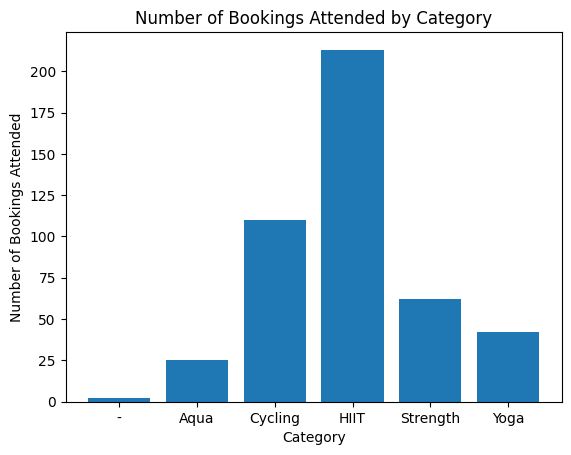

In [2]:
# Task 2
import matplotlib.pyplot as plt

# Extracting the 'category' and 'attended' columns
category_attended = fitness[['category', 'attended']]

# Grouping the data by category and counting the number of attended bookings
attended_counts = category_attended[category_attended['attended'] == 1].groupby('category').size()

# Creating the bar plot
plt.bar(attended_counts.index, attended_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Bookings Attended')
plt.title('Number of Bookings Attended by Category')

plt.show()

## Task 3

The majority of members have a shorter duration of membership, while a smaller proportion of members have a longer duration.

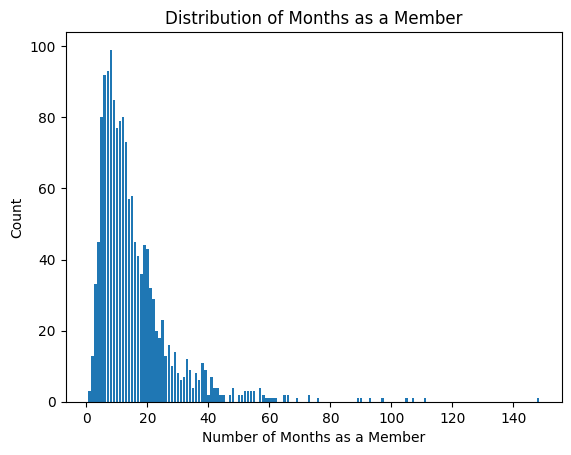

In [3]:
# Task 3

# Calculate the frequency of each value in 'months_as_member' column
month_counts = fitness['months_as_member'].value_counts().sort_index()

# Create a bar chart to visualize the distribution
plt.bar(month_counts.index, month_counts.values)

# Add labels and title
plt.xlabel('Number of Months as a Member')
plt.ylabel('Count')
plt.title('Distribution of Months as a Member')

# Show the plot
plt.show()

## Task 4
Members who have been with the club for a longer duration more likely to attend classes.

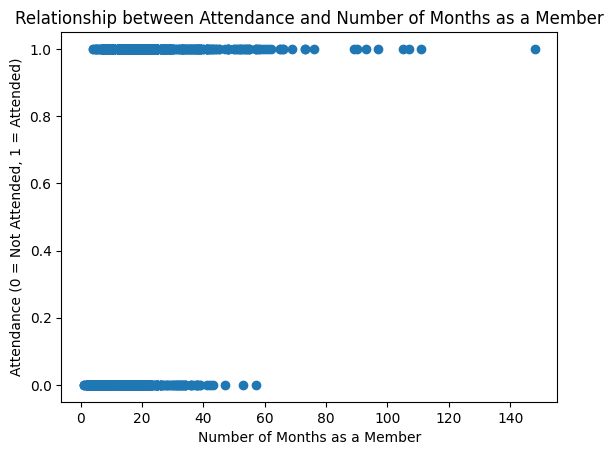

In [4]:
# Task 4
# Extracting the 'months_as_member' and 'attended' columns
attendance_months = fitness[['attended', 'months_as_member']]

# Creating the scatter plot
plt.scatter(attendance_months['months_as_member'], attendance_months['attended'])
plt.xlabel('Number of Months as a Member')
plt.ylabel('Attendance (0 = Not Attended, 1 = Attended)')
plt.title('Relationship between Attendance and Number of Months as a Member')

plt.show()

## Task 5
The type of machine learning problem in this case is classification.

This is because classification is a type of supervised learning where the goal is to predict a categorical or discrete outcome variable based on input features. In this scenario, the objective is to predict whether members will attend a fitness class or not, which is represented by the "attended" variable. The "attended" variable is binary, with values 1 for attended and 0 for not attended.

Therefore, the task is to classify each member into one of the two categories: attending or not attending the fitness class. It aligns with the classification problem, where the model learns from the available data to classify future instances into the appropriate class based on the input features.

## Task 6
Fitting a baseline model to predict whether members will attend using the data provided.

In [5]:
# Start coding here... 

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Extracting the features and target variable
X = fitness[['months_as_member']]
y = fitness['attended']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the baseline logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 76.33%


## Task 7
Fitting a comparison model to predict whether members will attend using the data
provided.

In [7]:
# Start coding here... 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extracting the features and target variable
X = fitness[['months_as_member']]
y = fitness['attended']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the comparison random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 74.67%


## Task 8
Below are the reasons why I chose the two models used in parts 6 and 7.
1. Logistic Regression (Baseline Model):
- I chose it because it's a simple and interpretable model.
- It is well-suited for binary classification tasks.
- It assumes a linear relationship between features and the target variable.

2. Random Forest Classifier (Comparison Model):
- I chose it because it's an ensemble learning method.
- It handles complex relationships and captures non-linearities.
- It combines multiple decision trees for improved accuracy.
- It is less prone to overfitting and works well with high-dimensional data.

My choice of models allows me to compare the performance of a simple and interpretable model (logistic regression) with a more complex and flexible model (random forest classifier).

## Task 9
Comparing the performance of the two models used in parts 6 and 7.

In [8]:
# Start coding here... 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extracting the features and target variable
X = fitness[['months_as_member']]
y = fitness['attended']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the baseline logistic regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Predicting with the baseline model
y_pred_baseline = baseline_model.predict(X_test)

# Fitting the comparison random forest classifier
comparison_model = RandomForestClassifier()
comparison_model.fit(X_train, y_train)

# Predicting with the comparison model
y_pred_comparison = comparison_model.predict(X_test)

# Calculating the accuracy scores
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
accuracy_comparison = accuracy_score(y_test, y_pred_comparison)

print("Baseline Model Accuracy: {:.2f}%".format(accuracy_baseline * 100))
print("Comparison Model Accuracy: {:.2f}%".format(accuracy_comparison * 100))

Baseline Model Accuracy: 76.33%
Comparison Model Accuracy: 74.67%


## Task 10
Higher accuracy indicates a higher percentage of correctly predicted instances.
The baseline logistic regression model has a higher accuracy score than the comparison random forest classifier, it suggests that the logistic regression model performs better. This is because the logistic regression model assumes a linear relationship.
However, accuracy is just one metric. It is important to consider other evaluation metrics and the specific problem context.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam